In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('C:/Users/pedro/Documents/Sagemaker Studio/SageMaker+Practical+Course+Package/SageMaker Practical Course Package/1. Employee Salary Prediction/salary.csv')

In [3]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
# exploration data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


<Figure size 1152x1152 with 0 Axes>

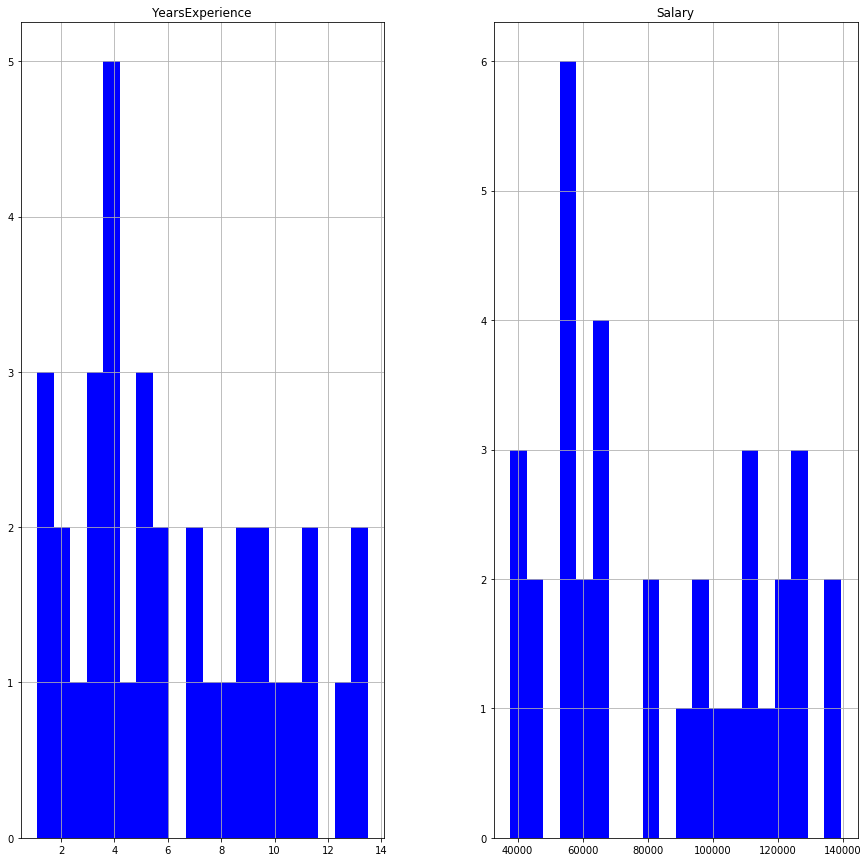

In [14]:
plt.figure(figsize=(16,16))
df.hist(bins = 20, color = 'b', figsize=(15,15))
plt.show()

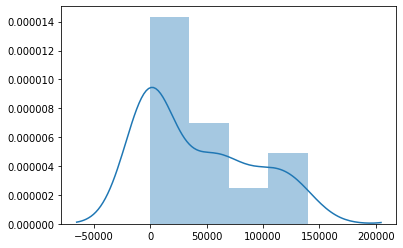

In [12]:
sns.distplot(df)

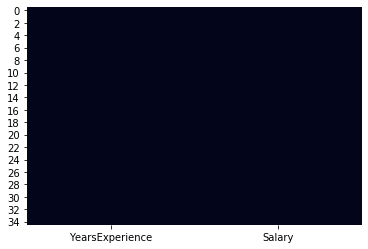

In [10]:
sns.heatmap(df.isnull(), cbar=False)

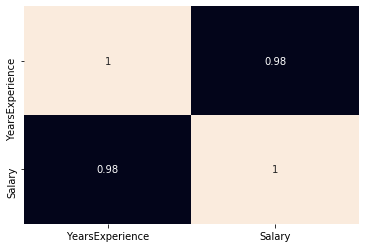

In [19]:
sns.heatmap(df.corr(), annot= True, cbar= False)
plt.show()

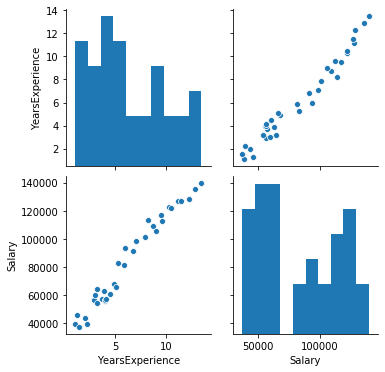

In [16]:
sns.pairplot(df)
plt.show()

In [20]:
# train model

In [21]:
# separate label and feature
X = df[['YearsExperience']]
y = df[['Salary']]

In [22]:
# transform in array
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [23]:
# split data in train and test
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [25]:
X_train

array([[ 4. ],
       [ 3.2],
       [ 5.1],
       [ 3.7],
       [12.9],
       [ 1.1],
       [ 2.2],
       [ 5.3],
       [ 9.6],
       [ 2.9],
       [ 4. ],
       [ 1.3],
       [ 1.5],
       [12.3],
       [ 2. ],
       [11.2],
       [ 8.2],
       [11.5],
       [ 3.9],
       [ 7.9],
       [ 5.9],
       [ 9. ],
       [ 3. ],
       [ 6.8],
       [13.5],
       [ 3.2],
       [ 4.5],
       [10.3]], dtype=float32)

In [26]:
# set model and metrics

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [29]:
sklearn_estimator = LinearRegression(fit_intercept=True)

In [30]:
sklearn_estimator = sklearn_estimator.fit(X_train, y_train)

In [31]:
sklearn_estimator.predict(y_test)

array([[1.00347904e+09],
       [4.89713760e+08],
       [9.38812288e+08],
       [8.43090368e+08],
       [5.82853440e+08],
       [1.04554074e+09],
       [8.05918592e+08]], dtype=float32)

In [37]:
accuracy = sklearn_estimator.score(X_test, y_test)
accuracy

0.8914234299592926

In [38]:
print('coef model (a) ', sklearn_estimator.coef_)
print('coef model (b) ', sklearn_estimator.intercept_)

coef model (a)  [[8578.769]]
coef model (b)  [29078.617]
